# Incidence of influenza-like illness in France

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek

The data on the incidence of influenza-like illness are available from the Web site of the [Réseau Sentinelles](http://www.sentiweb.fr/). We download them as a file in CSV format, in which each line corresponds to a week in the observation period. Only the complete dataset, starting in 1984 and ending with a recent week, is available for download.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-3.csv"

In the cell below we download the content present at the above link. In this way we can store it locally, protecting our analysis in case the link will change or be removed. Before downloading it we check that no copy has previously been created.

In [4]:
import os
import urllib.request

downloaded = "influenza_illness.csv"

if downloaded not in os.listdir():
    urllib.request.urlretrieve(data_url, downloaded)

This is the documentation of the data from [the download site](https://ns.sentiweb.fr/incidence/csv-schema-v1.json):

| Column name  | Description                                                                                                               |
|--------------|---------------------------------------------------------------------------------------------------------------------------|
| `week`       | ISO8601 Yearweek number as numeric (year times 100 + week nubmer)                                                               |
| `indicator`  | Unique identifier of the indicator, see metadata document https://www.sentiweb.fr/meta.json                               |
| `inc`        | Estimated incidence value for the time step, in the geographic level                                                      |
| `inc_low`    | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc_up`     | Upper bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100`     | Estimated rate incidence per 100,000 inhabitants                                                                          |
| `inc100_low` | Lower bound of the estimated incidence 95% Confidence Interval                                                            |
| `inc100_up`  | Upper bound of the estimated rate incidence 95% Confidence Interval                                                       |
| `geo_insee`  | Identifier of the geographic area, from INSEE https://www.insee.fr                                                        |
| `geo_name`   | Geographic label of the area, corresponding to INSEE code. This label is not an id and is only provided for human reading |

The first line of the CSV file is a comment, which we ignore with `skip=1`.

In [5]:
raw_data = pd.read_csv(downloaded, skiprows=1)
raw_data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202546          3   44675   37154.0   52196.0     67        56.0   
1     202545          3   47973   40703.0   55243.0     72        61.0   
2     202544          3   44837   38385.0   51289.0     67        57.0   
3     202543          3   55400   47640.0   63160.0     83        71.0   
4     202542          3   75239   66515.0   83963.0    112        99.0   
5     202541          3   86860   77648.0   96072.0    130       116.0   
6     202540          3   79169   71180.0   87158.0    118       106.0   
7     202539          3   72930   64872.0   80988.0    109        97.0   
8     202538          3   61435   54131.0   68739.0     92        81.0   
9     202537          3   46373   39689.0   53057.0     69        59.0   
10    202536          3   25581   20702.0   30460.0     38        31.0   
11    202535          3   22717   17480.0   27954.0     34        26.0   
12    202534          3   21429   16177.0   26681.0     32        24.0   
13    202533          3   16766   12022.0   21510.0     25        18.0   
14    202532          3   19900   14303.0   25497.0     30        22.0   
15    202531          3   18470   12625.0   24315.0     28        19.0   
16    202530          3   19166   14283.0   24049.0     29        22.0   
17    202529          3   18673   13815.0   23531.0     28        21.0   
18    202528          3   23285   18131.0   28439.0     35        27.0   
19    202527          3   21453   17129.0   25777.0     32        26.0   
20    202526          3   21945   17422.0   26468.0     33        26.0   
21    202525          3   23323   18546.0   28100.0     35        28.0   
22    202524          3   23154   18577.0   27731.0     35        28.0   
23    202523          3   24391   19307.0   29475.0     36        28.0   
24    202522          3   18755   14333.0   23177.0     28        21.0   
25    202521          3   23760   18671.0   28849.0     35        27.0   
26    202520          3   20265   15814.0   24716.0     30        23.0   
27    202519          3   16264   12394.0   20134.0     24        18.0   
28    202518          3   18115   13975.0   22255.0     27        21.0   
29    202517          3   22150   17291.0   27009.0     33        26.0   
...      ...        ...     ...       ...       ...    ...         ...   
2112  198521          3   26096   19621.0   32571.0     47        35.0   
2113  198520          3   27896   20885.0   34907.0     51        38.0   
2114  198519          3   43154   32821.0   53487.0     78        59.0   
2115  198518          3   40555   29935.0   51175.0     74        55.0   
2116  198517          3   34053   24366.0   43740.0     62        44.0   
2117  198516          3   50362   36451.0   64273.0     91        66.0   
2118  198515          3   63881   45538.0   82224.0    116        83.0   
2119  198514          3  134545  114400.0  154690.0    244       207.0   
2120  198513          3  197206  176080.0  218332.0    357       319.0   
2121  198512          3  245240  223304.0  267176.0    445       405.0   
2122  198511          3  276205  252399.0  300011.0    501       458.0   
2123  198510          3  353231  326279.0  380183.0    640       591.0   
2124  198509          3  369895  341109.0  398681.0    670       618.0   
2125  198508          3  389886  359529.0  420243.0    707       652.0   
2126  198507          3  471852  432599.0  511105.0    855       784.0   
2127  198506          3  565825  518011.0  613639.0   1026       939.0   
2128  198505          3  637302  592795.0  681809.0   1155      1074.0   
2129  198504          3  424937  390794.0  459080.0    770       708.0   
2130  198503          3  213901  174689.0  253113.0    388       317.0   
2131  198502          3   97586   80949.0  114223.0    177       147.0   
2132  198501          3   85489   65918.0  105060.0    155       120.0   
2133  198452          3   84830   60602.0  109058.0    154       110.0   
2134  198451

Are there missing data points? Yes, week 19 of year 1989 does not have any observed values.

In [6]:
raw_data[raw_data.isnull().any(axis=1)]

week  indicator inc  inc_low  inc_up inc100  inc100_low  inc100_up  \
1905  198919          3   -      NaN     NaN      -         NaN        NaN   

     geo_insee geo_name  
1905        FR   France

We delete this point, which does not have big consequence for our rather simple analysis.

In [7]:
data = raw_data.dropna().copy()
data

week  indicator     inc   inc_low    inc_up inc100  inc100_low  \
0     202546          3   44675   37154.0   52196.0     67        56.0   
1     202545          3   47973   40703.0   55243.0     72        61.0   
2     202544          3   44837   38385.0   51289.0     67        57.0   
3     202543          3   55400   47640.0   63160.0     83        71.0   
4     202542          3   75239   66515.0   83963.0    112        99.0   
5     202541          3   86860   77648.0   96072.0    130       116.0   
6     202540          3   79169   71180.0   87158.0    118       106.0   
7     202539          3   72930   64872.0   80988.0    109        97.0   
8     202538          3   61435   54131.0   68739.0     92        81.0   
9     202537          3   46373   39689.0   53057.0     69        59.0   
10    202536          3   25581   20702.0   30460.0     38        31.0   
11    202535          3   22717   17480.0   27954.0     34        26.0   
12    202534          3   21429   16177.0   26681.0     32        24.0   
13    202533          3   16766   12022.0   21510.0     25        18.0   
14    202532          3   19900   14303.0   25497.0     30        22.0   
15    202531          3   18470   12625.0   24315.0     28        19.0   
16    202530          3   19166   14283.0   24049.0     29        22.0   
17    202529          3   18673   13815.0   23531.0     28        21.0   
18    202528          3   23285   18131.0   28439.0     35        27.0   
19    202527          3   21453   17129.0   25777.0     32        26.0   
20    202526          3   21945   17422.0   26468.0     33        26.0   
21    202525          3   23323   18546.0   28100.0     35        28.0   
22    202524          3   23154   18577.0   27731.0     35        28.0   
23    202523          3   24391   19307.0   29475.0     36        28.0   
24    202522          3   18755   14333.0   23177.0     28        21.0   
25    202521          3   23760   18671.0   28849.0     35        27.0   
26    202520          3   20265   15814.0   24716.0     30        23.0   
27    202519          3   16264   12394.0   20134.0     24        18.0   
28    202518          3   18115   13975.0   22255.0     27        21.0   
29    202517          3   22150   17291.0   27009.0     33        26.0   
...      ...        ...     ...       ...       ...    ...         ...   
2112  198521          3   26096   19621.0   32571.0     47        35.0   
2113  198520          3   27896   20885.0   34907.0     51        38.0   
2114  198519          3   43154   32821.0   53487.0     78        59.0   
2115  198518          3   40555   29935.0   51175.0     74        55.0   
2116  198517          3   34053   24366.0   43740.0     62        44.0   
2117  198516          3   50362   36451.0   64273.0     91        66.0   
2118  198515          3   63881   45538.0   82224.0    116        83.0   
2119  198514          3  134545  114400.0  154690.0    244       207.0   
2120  198513          3  197206  176080.0  218332.0    357       319.0   
2121  198512          3  245240  223304.0  267176.0    445       405.0   
2122  198511          3  276205  252399.0  300011.0    501       458.0   
2123  198510          3  353231  326279.0  380183.0    640       591.0   
2124  198509          3  369895  341109.0  398681.0    670       618.0   
2125  198508          3  389886  359529.0  420243.0    707       652.0   
2126  198507          3  471852  432599.0  511105.0    855       784.0   
2127  198506          3  565825  518011.0  613639.0   1026       939.0   
2128  198505          3  637302  592795.0  681809.0   1155      1074.0   
2129  198504          3  424937  390794.0  459080.0    770       708.0   
2130  198503          3  213901  174689.0  253113.0    388       317.0   
2131  198502          3   97586   80949.0  114223.0    177       147.0   
2132  198501          3   85489   65918.0  105060.0    155       120.0   
2133  198452          3   84830   60602.0  109058.0    154       110.0   
2134  198451

Our dataset uses an uncommon encoding; the week number is attached
to the year number, leaving the impression of a six-digit integer.
That is how Pandas interprets it.

A second problem is that Pandas does not know about week numbers.
It needs to be given the dates of the beginning and end of the week.
We use the library `isoweek` for that.

Since the conversion is a bit lengthy, we write a small Python 
function for doing it. Then we apply it to all points in our dataset. 
The results go into a new column 'period'.

In [8]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

There are two more small changes to make.

First, we define the observation periods as the new index of
our dataset. That turns it into a time series, which will be
convenient later on.

Second, we sort the points chronologically.

In [9]:
sorted_data = data.set_index('period').sort_index()

We check the consistency of the data. Between the end of a period and
the beginning of the next one, the difference should be zero, or very small.
We tolerate an error of one second.

This is OK except for one pair of consecutive periods between which
a whole week is missing.

We recognize the dates: it's the week without observations that we
have deleted earlier!

In [10]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

1989-05-01/1989-05-07 1989-05-15/1989-05-21


A first look at the data!

In [11]:
sorted_data['inc'].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

A zoom on the last few years shows more clearly that the peaks are situated in winter.

In [12]:
sorted_data['inc'][-200:].plot()

TypeError: Empty 'DataFrame': no numeric data to plot

## Study of the annual incidence

Since the peaks of the epidemic happen in winter, near the transition
between calendar years, we define the reference period for the annual
incidence from August 1st of year $N$ to August 1st of year $N+1$. We
label this period as year $N+1$ because the peak is always located in
year $N+1$. The very low incidence in summer ensures that the arbitrariness
of the choice of reference period has no impact on our conclusions.

Our task is a bit complicated by the fact that a year does not have an
integer number of weeks. Therefore we modify our reference period a bit:
instead of August 1st, we use the first day of the week containing August 1st.

A final detail: the dataset starts in October 1984, the first peak is thus
incomplete, We start the analysis with the first full peak.

In [13]:
first_august_week = [pd.Period(pd.Timestamp(y, 8, 1), 'W')
                     for y in range(1985,
                                    sorted_data.index[-1].year)]

Starting from this list of weeks that contain August 1st, we obtain intervals of approximately one year as the periods between two adjacent weeks in this list. We compute the sums of weekly incidences for all these periods.

We also check that our periods contain between 51 and 52 weeks, as a safeguard against potential mistakes in our code.

In [14]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_august_week[:-1],
                        first_august_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

And here are the annual incidences.

In [15]:
yearly_incidence.plot(style='*')

TypeError: Empty 'DataFrame': no numeric data to plot

A sorted list makes it easier to find the highest values (at the end).

In [16]:
yearly_incidence.sort_values()

1999    1214713082934385324913033696810837170752023524...
2023    1325712222758674989283141202139528781399024192...
1998    1386208617993226184251314542323110189132921693...
2000    1478264071499757760033348191754312430285532418...
2024    1528614641191442666331695382474908563218720036...
1986    1695874882261140389302152798622219276053981949...
2007    1773001572217011071786253289451195013920166732...
2002    1899900299043994663802597362540718113202411896...
1996    1946700905188724963659489513123184991624514980...
2008    1965132418933531177110014494769159851351712987...
2019    2048183919621368150632154915734971747409804877...
2001    2159140516905188559029902243741719338272374002...
1987    2247102731155762105879182159982661528665335163...
2014    2270470947401889129146395027932453719794123911...
2020    2337159215931672101022953172489770918505712277...
2012    2409259024213312417846068365140071702114053748...
1992    2464625165420992372238024297460143732674028185...
2013    269663

Finally, a histogram clearly shows the few very strong epidemics, which affect about 10% of the French population,
but are rare: there were three of them in the course of 35 years. The typical epidemic affects only half as many people.

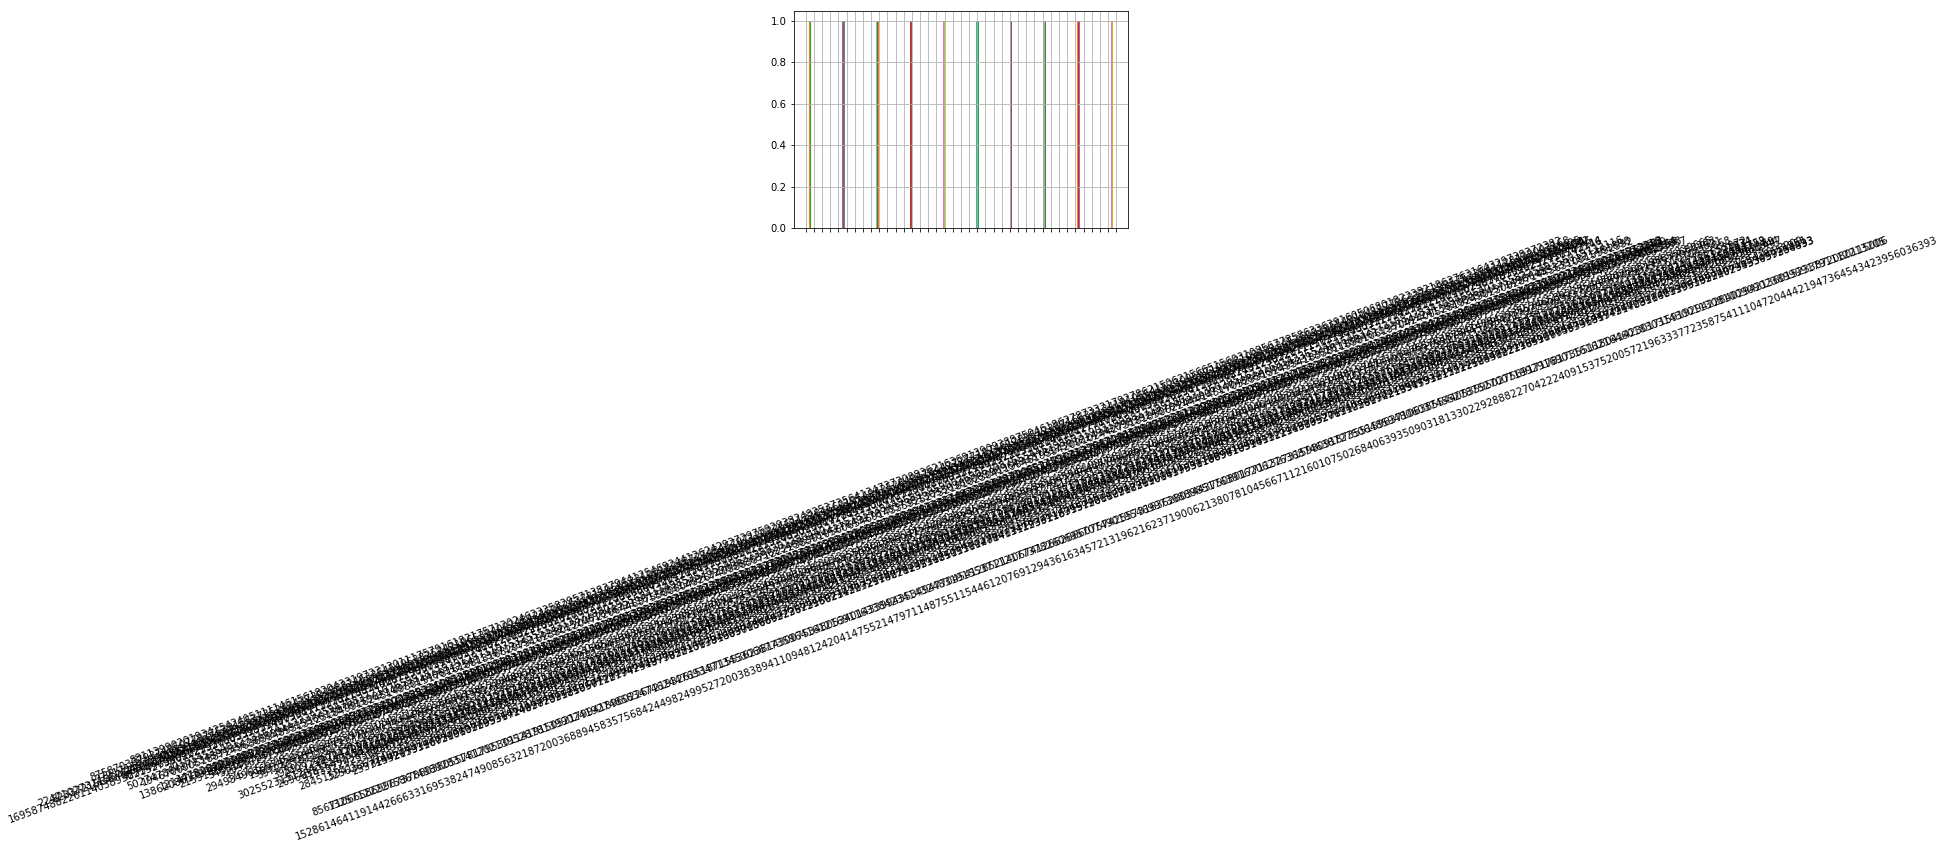

In [17]:
yearly_incidence.hist(xrot=20)